# Класифікація датсету

https://archive.ics.uci.edu/ml/datasets/glass+identification

Задача - усунення дисбалансу і перевірка впливу на точність моделі

In [2]:
# Підключаємо Google Drive з датасетами
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Імпортуємо всі необхідні бібліотеки
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

%config InlineBackend.figure_format = "png"

# зчитуємо набір даних
datasets_path = "/content/drive/MyDrive/Colab Notebooks/glass/"
glass_df = pd.read_csv(datasets_path + "glass.data")

In [4]:
# Проведемо первинний аналіз даних датасету скла
print("Загальний опис датасету:", glass_df.info(), "\n")
print(glass_df.isna().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB
Загальний опис датасету: None 

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64 



Датасет має 1 колонку, яка є фактично ідентифікатором запису, 9 фічей, що описують характеристики скла, та дискретну фічу (остання колонка), що описує тип скла. Саме тип скла і є таргетом.
NaN значень в датасеті немає.

Можемо побачити, що в датасеті немає імен колонок. Але вони є у файлі `glass.names`, який йде разом з датасетом. Тож задамо імена для колонок згідно опису в файлі:
```
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
```



In [5]:
# Додаємо назви колонок для датафрейму
glass_df.columns =["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]

In [6]:
# Колонка Id нам не потрібна, тож можемо її одразу видалити
glass_df = glass_df.drop(columns="Id")

In [7]:
# Тепер подивимось на перші записи
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [8]:
# Та подивимось на описову статистику
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


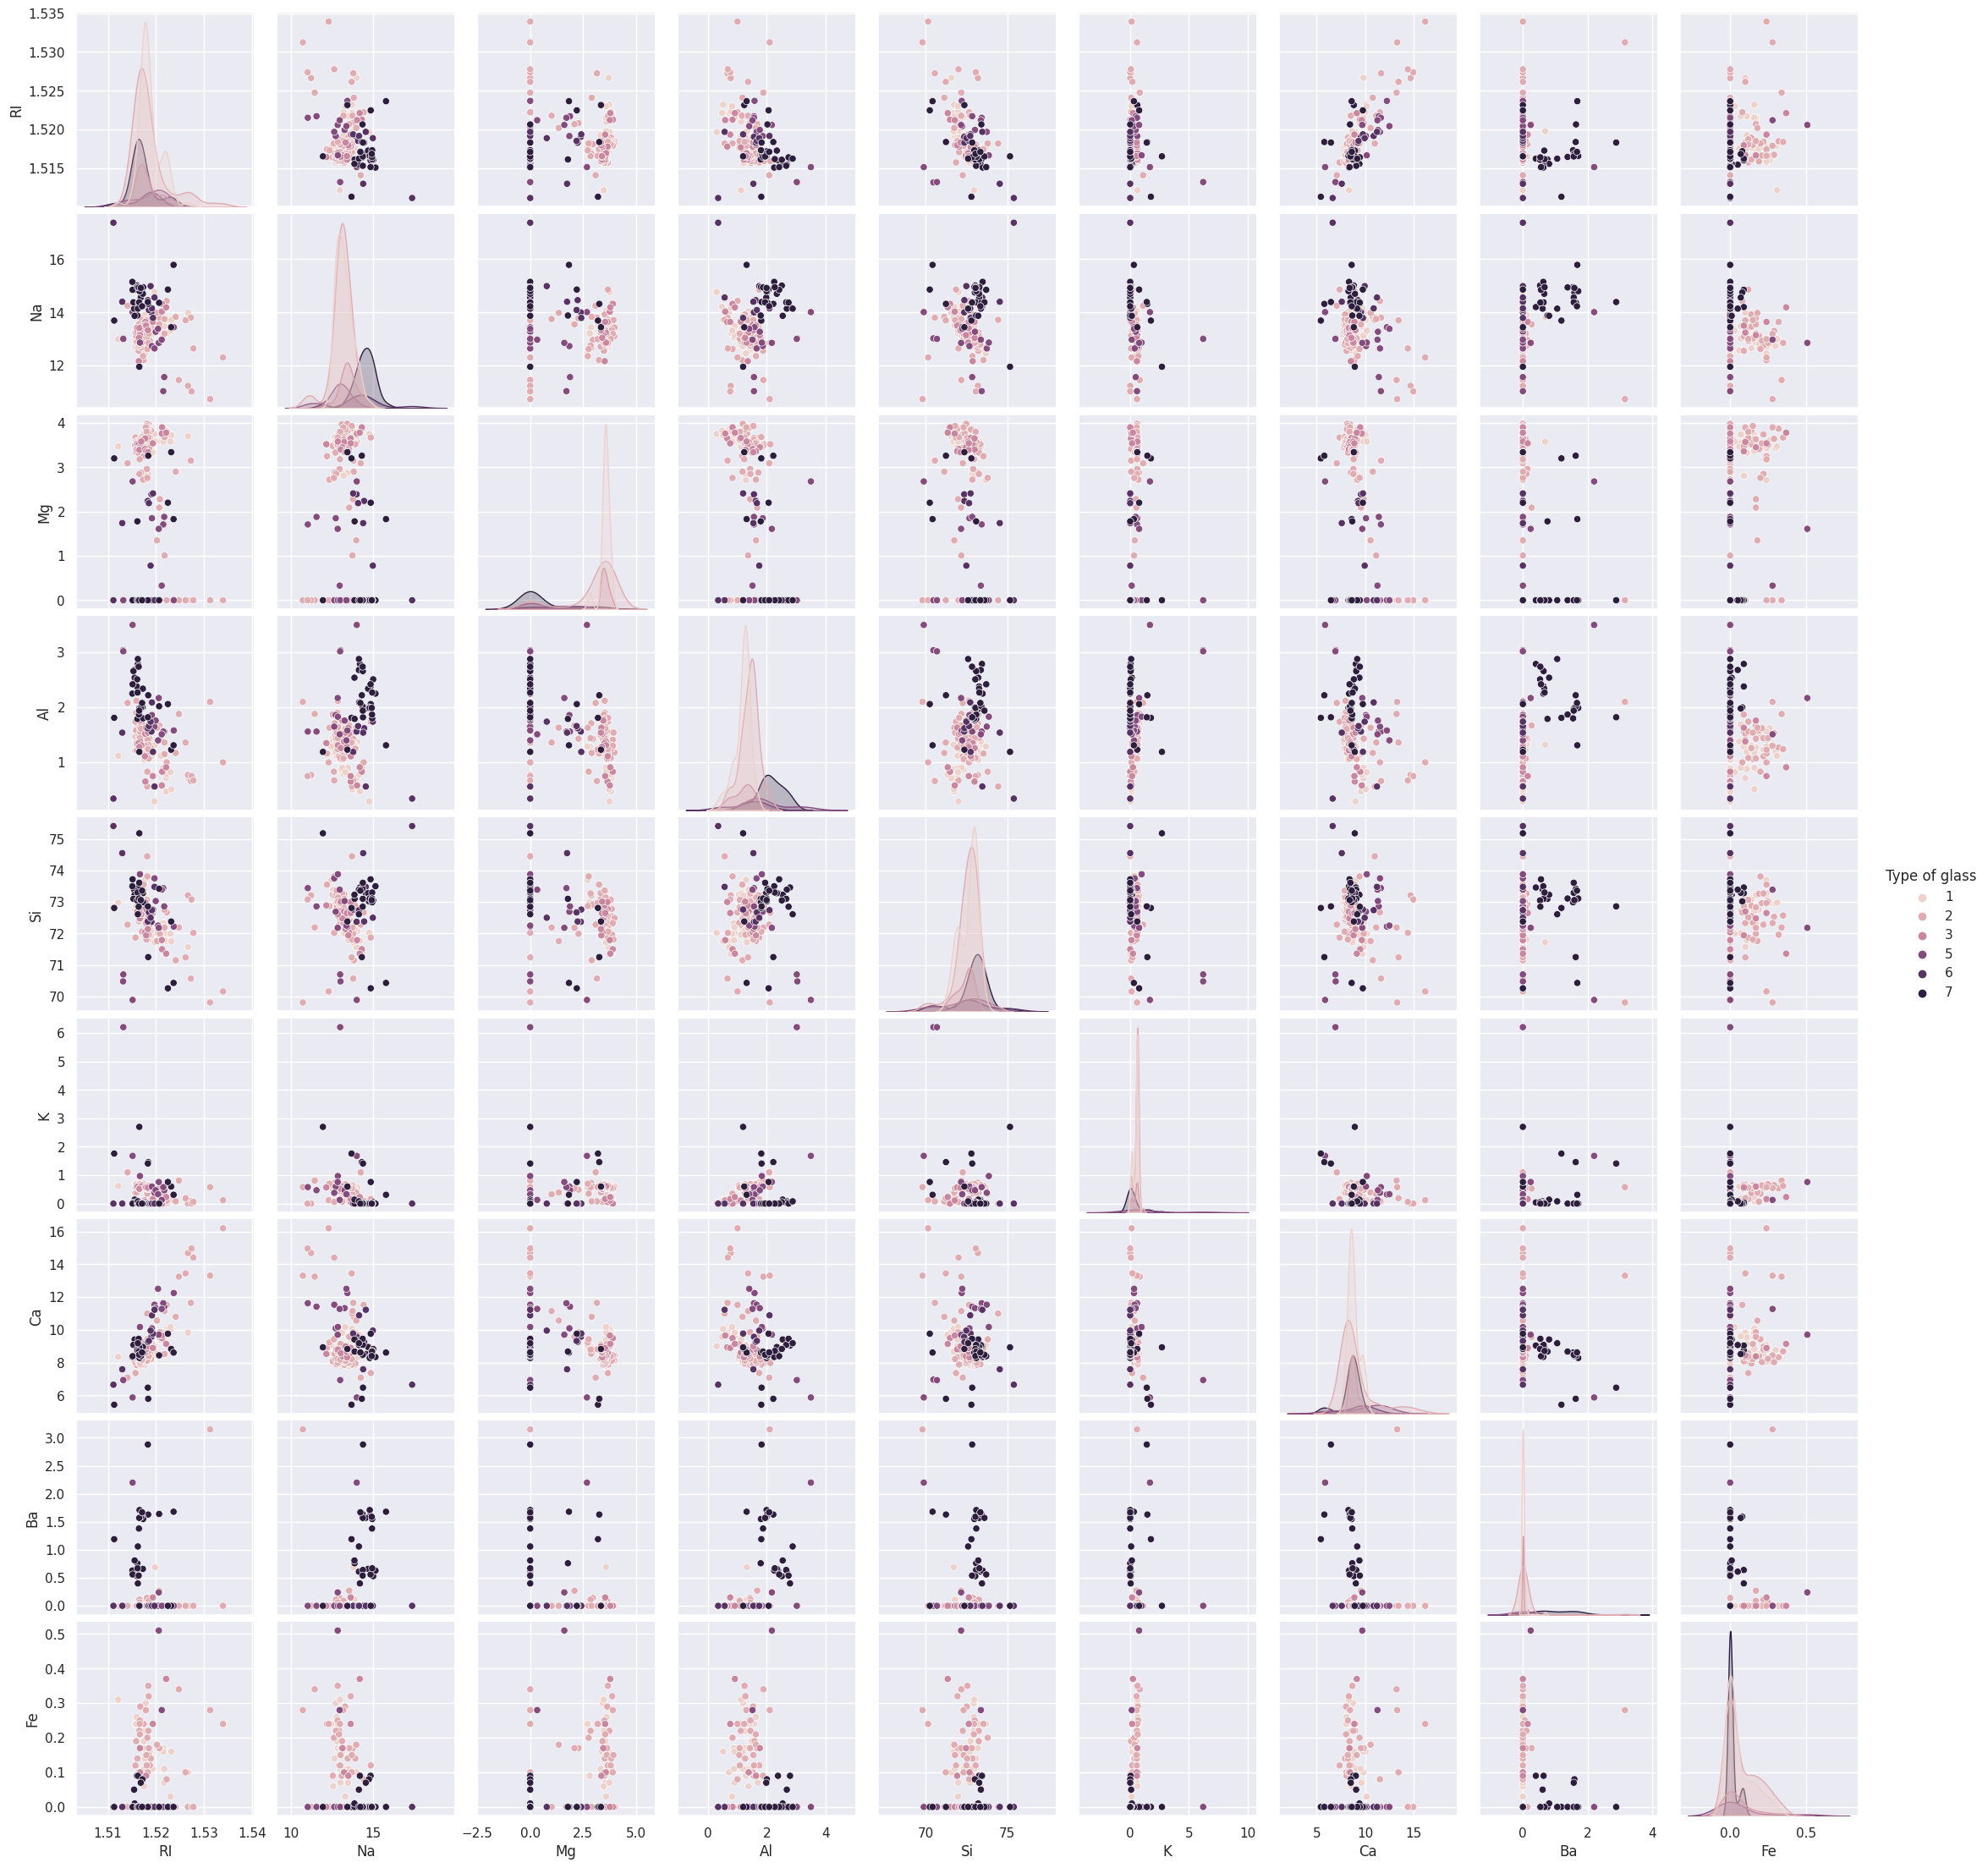

In [9]:
# Також давайте подивимось на кореляцію фічей
sns.pairplot(glass_df, hue="Type of glass");

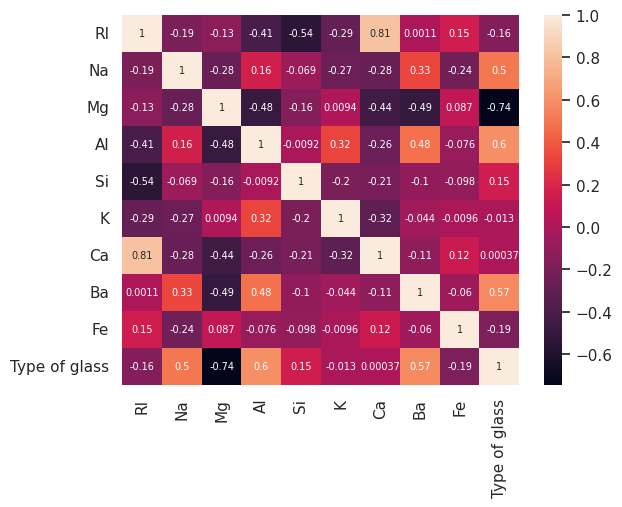

In [10]:
# Побудуємо матрицю кореляції та хітмапу, щоб краще побачити які фічі і наскільки кореляюють між собою
corr_matrix = glass_df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

Як можемо побачити, фічі датасету майже не корелюють між собою. Винятком є пара `RI` <=> `Ca`. Спробуємо прибрати цю корреляцію за допомогою Feature engineering.

In [11]:
# Feature engineering

# Так як у нас колює тільки одна фіча і розмірність датасету дозволяє її видалити - то давайте це і зробимо
glass_df = glass_df.drop(columns="Ca")

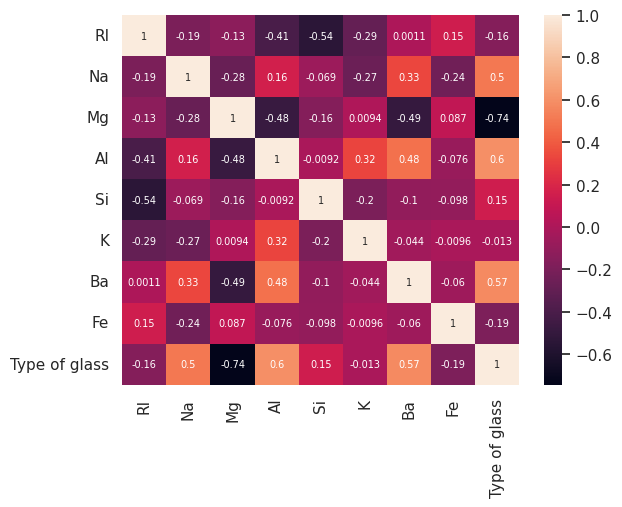

In [12]:
# Знову перевіряємо датасет на хітмапі
corr_matrix = glass_df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

<Axes: >

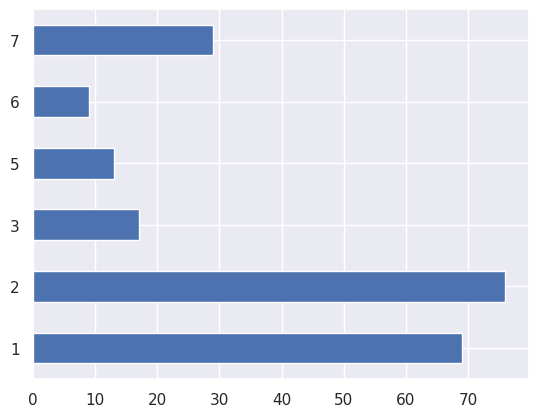

In [13]:
# Також подивимось на збалансованість датасету по таргету
glass_df["Type of glass"].value_counts(ascending=True).sort_index().plot(kind="barh")

Бачимо, що датасет не є збалансованим. Спочатку спробуємо натренувати декілька моделей без балансування датасету.

In [14]:
# Створимо декілька функцій для більш зручного підбору гіперпараметрів та відображення результату
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_curve, auc
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings("ignore")

def tune_params(model, params, x_valid, y_valid):
    """Tune model hyperparams."""
    try:
      grid_search = GridSearchCV(
          estimator=model,
          param_grid=params,
      )
      grid_search.fit(x_valid, y_valid)

      print(f"Результати для {model.__class__.__name__}:", "\n")
      print("Найкращий score:", grid_search.best_score_,)
      print("Найкращі параметри:", grid_search.best_params_, "\n")

      return grid_search.best_estimator_
    except Exception:
      pass


def show_results(model, x_train, y_train, metrical=False, imbalanced=False):
    """Show model scores and report."""
    # Навчаємо модель на тренувальних даних
    model.fit(x_train, y_train)
    predict = model.predict(x_test)

    # Значення середньоквардатичної похибки
    print(
        "Середньоквадратична похибка:",
        mean_squared_error(y_test, predict),
    )

    # Метрики моделі
    if metrical:
      # Точність моделі
      print(
          "Точність моделі на тестових даних:",
          accuracy_score(y_test, predict)),

      if imbalanced:
        print(
            "Метрики моделі на незбалансованому датасеті:",
            "\n",
            classification_report_imbalanced(y_test, predict)
        )
      else:
        print(
            "Метрики моделі:",
            "\n",
            classification_report(y_test, predict),
        )
    else:
      # Подивимось на точність моделі на тестових даних
      print(
          "Точність моделі на тестових даних:",
          model.score(x_test, y_test) * 100,
      )

In [15]:
# Розбиваємо датасет на X та Y
X = glass_df.drop(columns="Type of glass")  # фічі
Y = glass_df["Type of glass"]  # таргет

In [16]:
# Зробимо масштабування фіч використовуючи MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
# Ділемо датасет на тренувальну, валідаційну та тестові частини за схемою 60-20-20, спочатку без стратифікації
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=42)

In [18]:
# Спочатку спробуємо модель лінійної регресії з підбором гіперпараметрів
from sklearn.linear_model import LinearRegression

lr_params = {
    "fit_intercept": [True, False],
    "n_jobs": [1, 2, 4, 6, 8, 10],
    "positive": [True, False],
}
best_model = tune_params(
    model=LinearRegression(),
    params=lr_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_model, x_train, y_train, imbalanced=True)

Результати для LinearRegression: 

Найкращий score: 0.5780650701026351
Найкращі параметри: {'fit_intercept': False, 'n_jobs': 1, 'positive': False} 

Середньоквадратична похибка: 1.6958780121470132
Точність моделі на тестових даних: 55.71075643418324


In [19]:
# Побудуємо модель LogisticRegression одразу з підбором гіперпараметрів
from sklearn.linear_model import LogisticRegression

log_r_params = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "dual": [True, False],
    "C": [0.1, 0.5, 1.0],
    "fit_intercept": [True, False],
    "intercept_scaling": [1, 2, 5, 10],
    "multi_class": ["auto", "ovr", "multinomial"],
    "l1_ratio": [0.1, 0.2, 0.5],
}

best_model = tune_params(
    model=LogisticRegression(),
    params=log_r_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_model, x_train, y_train, imbalanced=True)

Результати для LogisticRegression: 

Найкращий score: 0.6083333333333334
Найкращі параметри: {'C': 0.1, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'multi_class': 'auto', 'penalty': None} 

Середньоквадратична похибка: 2.4651162790697674
Точність моделі на тестових даних: 65.11627906976744


In [20]:
# Спробуємо модель KNeighborsClassifier одразу с підбором гіперпараметрів
from sklearn.neighbors import KNeighborsClassifier

kn_params = {
    "n_neighbors": [5, 10, 25, 50, 100, 200],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
    "metric": ["euclidean", "haversine", "l1", "l2", "manhattan",],
    "n_jobs": [None, 1, 2, 5, 10],
}

best_model = tune_params(
    model=KNeighborsClassifier(),
    params=kn_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_model, x_train, y_train, metrical=True, imbalanced=True)

Результати для KNeighborsClassifier: 

Найкращий score: 0.5833333333333334
Найкращі параметри: {'algorithm': 'auto', 'metric': 'l1', 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} 

Середньоквадратична похибка: 2.441860465116279
Точність моделі на тестових даних: 0.627906976744186
Метрики моделі на незбалансованому датасеті: 
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.90      0.79      0.69      0.84      0.72        10
          2       0.78      0.64      0.81      0.70      0.72      0.51        22
          3       0.00      0.00      1.00      0.00      0.00      0.00         2
          5       0.00      0.00      0.90      0.00      0.00      0.00         2
          6       1.00      0.50      1.00      0.67      0.71      0.48         2
          7       0.75      0.60      0.97      0.67      0.76      0.56         5

avg / total       0.66      0.63      0.85      0.63      0.68      0.5

По score моделей можна зробити висновок, що наче вони працюють, але значення MSE дуже велике. Також можна побачити у моделі `KNeighborsClassifier` великий розбіг між значеннями `precision` та `recall`. А для типів 3 та 5 ці значення взагалі дорівнюють нулю. Це значить, що збалансованість датасету дуже впливає на якість моделі. Тож спробуємо збалансувати датасет.

# Балансування датасету

Розмір датасету не дозволяє нам викоростита Undersampling стратегію, тож давайте спробуємо Oversamling.

In [21]:
# Подвимось на кількість значень таргету
glass_df["Type of glass"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

Бачимо, що значення для типів 3, 5, 6, 7 набагато менше, ніж для типів 1 та 2. Найбільше маємо записів для классу 2, тож цей клас являється мажоритарним у датасеті.

In [22]:
type_1 = glass_df[glass_df["Type of glass"] == 1]
maj_type = glass_df[glass_df["Type of glass"] == 2]
type_3 = glass_df[glass_df["Type of glass"] == 3]
type_5 = glass_df[glass_df["Type of glass"] == 5]
type_6 = glass_df[glass_df["Type of glass"] == 6]
type_7 = glass_df[glass_df["Type of glass"] == 7]

maj_type_num = maj_type["Type of glass"].count()

# тип 3
type_3_over = type_3.sample(maj_type_num, replace=True)

# тип 5
type_5_over = type_5.sample(maj_type_num, replace=True)

# тип 6
type_6_over = type_6.sample(maj_type_num, replace=True)

oversampled_df = pd.concat([type_1, maj_type, type_3_over, type_5_over, type_6_over, type_7], axis=0)
oversampled_df["Type of glass"].value_counts()

2    76
3    76
5    76
6    76
1    69
7    29
Name: Type of glass, dtype: int64

Ми зробили ручний Oversampling для усіх міноритарних класів (3, 5, 6). Давайте перевіримо наскільки ця стратегія є ефективною для нашого випадку.

In [23]:
# Розбиваємо датасет та масштабуємо фічі
X = oversampled_df.drop(columns="Type of glass")  # фічі
Y = oversampled_df["Type of glass"]  # таргет

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [24]:
# Ділимо датасет
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=42)

In [25]:
# Створимо функцію для тестування моделей на різних датасетах
testing_params = [
    {
        "model": LinearRegression,
        "params": lr_params,
    },
    {
        "model": LogisticRegression,
        "params": log_r_params,
    },
    {
        "model": KNeighborsClassifier,
        "params": kn_params,
    }
]

def run_tests(x_train, y_train, x_valid, y_valid):
  for i in testing_params:
      model = i["model"]
      params = i["params"]

      best_model = tune_params(
          model=model(),
          params=params,
          x_valid=x_valid,
          y_valid=y_valid,
      )
      show_results(best_model, x_train, y_train, metrical=model.__name__ == "KNeighborsClassifier")
      print("\n")

In [26]:
# Перевіримо результат
print(f"Результати ручного балансування датасету методом Oversampling.", "\n")
run_tests(x_train, y_train, x_valid, y_valid)

Результати ручного балансування датасету методом Oversampling. 

Результати для LinearRegression: 

Найкращий score: 0.44139745086122095
Найкращі параметри: {'fit_intercept': False, 'n_jobs': 1, 'positive': False} 

Середньоквадратична похибка: 1.2452584080366302
Точність моделі на тестових даних: 70.64057634350894


Результати для LogisticRegression: 

Найкращий score: 0.7625
Найкращі параметри: {'C': 0.1, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'multi_class': 'ovr', 'penalty': None} 

Середньоквадратична похибка: 2.308641975308642
Точність моделі на тестових даних: 72.8395061728395


Результати для KNeighborsClassifier: 

Найкращий score: 0.7875
Найкращі параметри: {'algorithm': 'auto', 'metric': 'l1', 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

Середньоквадратична похибка: 0.7530864197530864
Точність моделі на тестових даних: 0.9135802469135802
Метрики моделі: 
               precision    recall  f1-score   support

     

Як бачимо, завдяки балансуванню за допомогою стратегії Oversampling якість кожної моделі зросла приблизно на 10 умовних відсотків.

У моделі KNeighborsClassifier покращився показник precision та recall, та F-значення.

Тепер давайте подивимось, як впливає розбиття датасету з викорастанням стратифікації на якість моделей.

# Стратифікація датасету

In [27]:
# Ділимо збалансований датасет з використанням процесу стратифікації
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6, random_state=42, stratify=Y)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

In [28]:
# Подивимось, як стратифікація датасету вплине на якість моделей
print(f"Результати стратифікації датасету.", "\n")
run_tests(x_train, y_train, x_valid, y_valid)

Результати стратифікації датасету. 

Результати для LinearRegression: 

Найкращий score: 0.5720967320342398
Найкращі параметри: {'fit_intercept': True, 'n_jobs': 1, 'positive': True} 

Середньоквадратична похибка: 1.7203666329784926
Точність моделі на тестових даних: 57.05301925663233


Результати для LogisticRegression: 

Найкращий score: 0.7125
Найкращі параметри: {'C': 0.1, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'multi_class': 'auto', 'penalty': None} 

Середньоквадратична похибка: 0.4691358024691358
Точність моделі на тестових даних: 79.01234567901234


Результати для KNeighborsClassifier: 

Найкращий score: 0.7625
Найкращі параметри: {'algorithm': 'auto', 'metric': 'l1', 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

Середньоквадратична похибка: 0.48148148148148145
Точність моделі на тестових даних: 0.8888888888888888
Метрики моделі: 
               precision    recall  f1-score   support

           1       0.85      0.7

Схоже, що стратифікація значно впливає на якість моделей, знижуючи їх середньоквадратичну похибку.

Давайте також роглянемо пакет `imblearn`, який дозвилить нам спробувати інші підходи при балансуванні. Почнемо з рандомного оверсемплінгу.

In [29]:
# Розбиваємо датасет та масштабуємо фічі
X = glass_df.drop(columns="Type of glass")  # фічі
Y = glass_df["Type of glass"]  # таргет

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Ділимо датасет з використанням процесу стратифікації
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6, random_state=42, stratify=Y)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

In [30]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.combine import SMOTETomek
from collections import Counter


for b in [RandomOverSampler, SMOTE, SMOTETomek, SVMSMOTE]:
    balancer = b(random_state=42, sampling_strategy="all")
    x_train_resampled, y_train_resampled = balancer.fit_resample(x_train, y_train)

    print(f"Тестування балансера {b.__name__}", "\n")
    print(Counter(y_train).items())
    print(Counter(y_train_resampled).items(), "\n")

    # Перевіремо вплив на моделі
    print(f"Перевірка впливу балансера датасету {b.__name__} на фінальну якість моделей.", "\n")
    run_tests(x_train_resampled, y_train_resampled, x_valid, y_valid)

Тестування балансера RandomOverSampler 

dict_items([(1, 41), (2, 45), (5, 8), (7, 17), (3, 10), (6, 6)])
dict_items([(1, 45), (2, 45), (5, 45), (7, 45), (3, 45), (6, 45)]) 

Перевірка впливу балансера датасету RandomOverSampler на фінальну якість моделей. 

Результати для LinearRegression: 

Найкращий score: -1.0812116667073
Найкращі параметри: {'fit_intercept': False, 'n_jobs': 1, 'positive': True} 

Середньоквадратична похибка: 3.039144958688604
Точність моделі на тестових даних: 29.810404339055374


Результати для LogisticRegression: 

Найкращий score: 0.6527777777777778
Найкращі параметри: {'C': 0.1, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'multi_class': 'ovr', 'penalty': None} 

Середньоквадратична похибка: 2.116279069767442
Точність моделі на тестових даних: 51.162790697674424


Результати для KNeighborsClassifier: 

Найкращий score: 0.6333333333333334
Найкращі параметри: {'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': None, 'n_neigh

# Висновок

Стратифікація та балансування датасету мають значний вплив на фінальну якість моделей. При необхідності виконати балансування потрібно враховувати кінцеву задачу, визначитись з методом балансування, а також виконати підбір оптимального балансера для досягнення максимальних результатів.